In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
import keras
from keras import backend as K
import tensorflow as tf

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from rl.agents import *
from rl.policy import *
from rl.memory import *
from rl.random import *
import gym
from gym import Env, Space, spaces

In [5]:
env = gym.make('CartPole-v0')
env.seed(123)
env.reset()
nb_actions = env.action_space.n
observation_shape = env.observation_space.shape
window_length = 1

In [6]:
model_x = Input((window_length, ) + observation_shape)
model_y = Flatten()(model_x)
model_y = Dense(4, activation='elu')(model_y)
model_y = Dense(4, activation='elu')(model_y)
model_y = Dense(4, activation='elu')(model_y)
model_y = Dense(nb_actions)(model_y)
model = Model(model_x, model_y)

In [9]:
layer = model.layers[2]

In [10]:
layer.output

<tf.Tensor 'dense_1/Elu:0' shape=(?, 4) dtype=float32>

In [83]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(100000, window_length=window_length)
dqn = DQNAgent(model, nb_actions=nb_actions, policy=policy, memory=memory, 
               nb_steps_warmup=100, target_model_update=0.9)

In [84]:
dqn.compile(Adam(), metrics=['mse'])

In [85]:
hist = dqn.fit(env, nb_steps=100000, visualize=False, verbose=2,
              callbacks=[LambdaCallback(on_epoch_end=lambda epoch, logs:print(epoch, logs))])

Training for 100000 steps ...
0 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 9}
     9/100000: episode: 1, duration: 0.503s, episode steps: 9, steps per second: 18, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.158 [-1.581, 2.538], loss: --, mean_squared_error: --, mean_q: --
1 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 18}
    18/100000: episode: 2, duration: 0.016s, episode steps: 9, steps per second: 551, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.146 [-2.796, 1.720], loss: --, mean_squared_error: --, mean_q: --
2 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 27}
    27/100000: episode: 3, duration: 0.018s, episode steps: 9, steps per second: 505, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.144 [-2.790, 1.787], loss: --, mean_squared_er

25 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 249}
   249/100000: episode: 26, duration: 0.139s, episode steps: 10, steps per second: 72, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.153 [-3.074, 1.949], loss: 1.810319, mean_squared_error: 2.349306, mean_q: 2.944232
26 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 259}
   259/100000: episode: 27, duration: 0.181s, episode steps: 10, steps per second: 55, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.141 [-3.058, 1.974], loss: 2.288061, mean_squared_error: 3.063325, mean_q: 3.255407
27 {'episode_reward': 8.0, 'nb_episode_steps': 8, 'nb_steps': 267}
   267/100000: episode: 28, duration: 0.237s, episode steps: 8, steps per second: 34, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.159 [-2.563, 1.578], lo

49 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 485}
   485/100000: episode: 50, duration: 0.130s, episode steps: 11, steps per second: 84, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.909 [0.000, 1.000], mean observation: -0.112 [-2.758, 1.755], loss: 4.375133, mean_squared_error: 12.005654, mean_q: 7.932797
50 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 494}
   494/100000: episode: 51, duration: 0.103s, episode steps: 9, steps per second: 88, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.165 [-2.896, 1.743], loss: 5.064598, mean_squared_error: 13.466959, mean_q: 8.349032
51 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 504}
   504/100000: episode: 52, duration: 0.114s, episode steps: 10, steps per second: 88, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.137 [-2.583, 1.585], 

73 {'episode_reward': 18.0, 'nb_episode_steps': 18, 'nb_steps': 722}
   722/100000: episode: 74, duration: 0.200s, episode steps: 18, steps per second: 90, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.667 [0.000, 1.000], mean observation: -0.067 [-2.224, 1.399], loss: 4.550766, mean_squared_error: 26.151711, mean_q: 9.428696
74 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 732}
   732/100000: episode: 75, duration: 0.110s, episode steps: 10, steps per second: 91, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.128 [-3.015, 1.950], loss: 4.077215, mean_squared_error: 25.978638, mean_q: 9.318647
75 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 743}
   743/100000: episode: 76, duration: 0.135s, episode steps: 11, steps per second: 82, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.909 [0.000, 1.000], mean observation: -0.133 [-2.733, 1.73

98 {'episode_reward': 8.0, 'nb_episode_steps': 8, 'nb_steps': 972}
   972/100000: episode: 99, duration: 0.090s, episode steps: 8, steps per second: 89, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.145 [-2.528, 1.526], loss: 1.477752, mean_squared_error: 31.352566, mean_q: 8.787029
99 {'episode_reward': 8.0, 'nb_episode_steps': 8, 'nb_steps': 980}
   980/100000: episode: 100, duration: 0.099s, episode steps: 8, steps per second: 80, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.150 [-2.588, 1.573], loss: 1.298925, mean_squared_error: 28.374722, mean_q: 8.363178
100 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 990}
   990/100000: episode: 101, duration: 0.120s, episode steps: 10, steps per second: 83, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.137 [-2.522, 1.539], l

122 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 1211}
  1211/100000: episode: 123, duration: 0.106s, episode steps: 9, steps per second: 85, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.145 [-1.803, 2.847], loss: 0.597966, mean_squared_error: 25.752005, mean_q: 6.569121
123 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 1221}
  1221/100000: episode: 124, duration: 0.119s, episode steps: 10, steps per second: 84, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.100 [0.000, 1.000], mean observation: 0.132 [-1.570, 2.452], loss: 0.631067, mean_squared_error: 23.323650, mean_q: 6.172790
124 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 1231}
  1231/100000: episode: 125, duration: 0.119s, episode steps: 10, steps per second: 84, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.142 [-1.990, 3.

146 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 1454}
  1454/100000: episode: 147, duration: 0.117s, episode steps: 10, steps per second: 85, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.148 [-2.624, 1.553], loss: 0.919206, mean_squared_error: 16.182621, mean_q: 5.629184
147 {'episode_reward': 8.0, 'nb_episode_steps': 8, 'nb_steps': 1462}
  1462/100000: episode: 148, duration: 0.089s, episode steps: 8, steps per second: 90, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.158 [-2.579, 1.540], loss: 1.127437, mean_squared_error: 15.079788, mean_q: 5.354965
148 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 1471}
  1471/100000: episode: 149, duration: 0.104s, episode steps: 9, steps per second: 86, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.889 [0.000, 1.000], mean observation: -0.140 [-2.430, 1.5

169 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 1681}
  1681/100000: episode: 170, duration: 0.106s, episode steps: 9, steps per second: 85, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.159 [-2.875, 1.764], loss: 0.967388, mean_squared_error: 13.845928, mean_q: 5.269801
170 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 1690}
  1690/100000: episode: 171, duration: 0.113s, episode steps: 9, steps per second: 80, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.163 [-2.862, 1.759], loss: 0.892995, mean_squared_error: 14.472955, mean_q: 5.504492
171 {'episode_reward': 8.0, 'nb_episode_steps': 8, 'nb_steps': 1698}
  1698/100000: episode: 172, duration: 0.093s, episode steps: 8, steps per second: 86, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.137 [-2.564, 1.609],

193 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 1919}
  1919/100000: episode: 194, duration: 0.103s, episode steps: 9, steps per second: 87, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.889 [0.000, 1.000], mean observation: -0.125 [-2.279, 1.367], loss: 0.785119, mean_squared_error: 15.258711, mean_q: 5.447824
194 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 1929}
  1929/100000: episode: 195, duration: 0.118s, episode steps: 10, steps per second: 85, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.155 [-3.068, 1.955], loss: 0.636239, mean_squared_error: 13.130396, mean_q: 5.137650
195 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 1939}
  1939/100000: episode: 196, duration: 0.116s, episode steps: 10, steps per second: 86, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.158 [-3.093,

217 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 2162}
  2162/100000: episode: 218, duration: 0.104s, episode steps: 9, steps per second: 87, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.889 [0.000, 1.000], mean observation: -0.131 [-2.256, 1.347], loss: 0.771861, mean_squared_error: 15.329686, mean_q: 5.533823
218 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 2173}
  2173/100000: episode: 219, duration: 0.127s, episode steps: 11, steps per second: 86, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.909 [0.000, 1.000], mean observation: -0.125 [-2.841, 1.802], loss: 0.871522, mean_squared_error: 15.042536, mean_q: 5.436727
219 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 2183}
  2183/100000: episode: 220, duration: 0.123s, episode steps: 10, steps per second: 81, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.125 [-2.482,

240 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 2395}
  2395/100000: episode: 241, duration: 0.120s, episode steps: 10, steps per second: 83, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.122 [-2.992, 1.978], loss: 0.787574, mean_squared_error: 15.640402, mean_q: 5.556851
241 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 2406}
  2406/100000: episode: 242, duration: 0.126s, episode steps: 11, steps per second: 88, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.909 [0.000, 1.000], mean observation: -0.113 [-2.738, 1.793], loss: 0.580615, mean_squared_error: 15.826211, mean_q: 5.558809
242 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 2416}
  2416/100000: episode: 243, duration: 0.112s, episode steps: 10, steps per second: 89, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.160 [-2.

264 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 2641}
  2641/100000: episode: 265, duration: 0.130s, episode steps: 11, steps per second: 85, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.545 [0.000, 1.000], mean observation: -0.123 [-1.381, 0.800], loss: 0.953119, mean_squared_error: 17.036612, mean_q: 5.451298
265 {'episode_reward': 27.0, 'nb_episode_steps': 27, 'nb_steps': 2668}
  2668/100000: episode: 266, duration: 0.302s, episode steps: 27, steps per second: 89, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.027 [-1.899, 2.559], loss: 0.729309, mean_squared_error: 17.027227, mean_q: 5.466307
266 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 2678}
  2678/100000: episode: 267, duration: 0.113s, episode steps: 10, steps per second: 89, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.151 [-1.95

288 {'episode_reward': 10.0, 'nb_episode_steps': 10, 'nb_steps': 2949}
  2949/100000: episode: 289, duration: 0.121s, episode steps: 10, steps per second: 83, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.138 [-1.966, 3.026], loss: 0.848625, mean_squared_error: 27.639563, mean_q: 7.106053
289 {'episode_reward': 12.0, 'nb_episode_steps': 12, 'nb_steps': 2961}
  2961/100000: episode: 290, duration: 0.139s, episode steps: 12, steps per second: 86, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.167 [0.000, 1.000], mean observation: 0.129 [-1.589, 2.610], loss: 0.924653, mean_squared_error: 26.589109, mean_q: 6.891869
290 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 2972}
  2972/100000: episode: 291, duration: 0.123s, episode steps: 11, steps per second: 90, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.091 [0.000, 1.000], mean observation: 0.126 [-1.758

311 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 3174}
  3174/100000: episode: 312, duration: 0.110s, episode steps: 9, steps per second: 82, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.145 [-1.808, 2.851], loss: 0.648555, mean_squared_error: 29.864908, mean_q: 7.300298
312 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 3183}
  3183/100000: episode: 313, duration: 0.106s, episode steps: 9, steps per second: 85, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.128 [-1.381, 2.256], loss: 1.004437, mean_squared_error: 33.670540, mean_q: 7.801104
313 {'episode_reward': 12.0, 'nb_episode_steps': 12, 'nb_steps': 3195}
  3195/100000: episode: 314, duration: 0.135s, episode steps: 12, steps per second: 89, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.083 [0.000, 1.000], mean observation: 0.099 [-1.923, 2.970]

335 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 3419}
  3419/100000: episode: 336, duration: 0.106s, episode steps: 9, steps per second: 85, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.147 [-1.782, 2.820], loss: 0.848519, mean_squared_error: 37.801601, mean_q: 8.266828
336 {'episode_reward': 9.0, 'nb_episode_steps': 9, 'nb_steps': 3428}
  3428/100000: episode: 337, duration: 0.113s, episode steps: 9, steps per second: 79, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.126 [-1.771, 2.772], loss: 0.981376, mean_squared_error: 35.571079, mean_q: 7.876650
337 {'episode_reward': 12.0, 'nb_episode_steps': 12, 'nb_steps': 3440}
  3440/100000: episode: 338, duration: 0.134s, episode steps: 12, steps per second: 89, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.167 [0.000, 1.000], mean observation: 0.108 [-1.597, 2.503]

359 {'episode_reward': 11.0, 'nb_episode_steps': 11, 'nb_steps': 3722}
  3722/100000: episode: 360, duration: 0.127s, episode steps: 11, steps per second: 87, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.182 [0.000, 1.000], mean observation: 0.126 [-1.335, 2.241], loss: 0.508158, mean_squared_error: 33.046440, mean_q: 7.535036
360 {'episode_reward': 25.0, 'nb_episode_steps': 25, 'nb_steps': 3747}
  3747/100000: episode: 361, duration: 0.262s, episode steps: 25, steps per second: 96, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: 0.052 [-1.158, 1.803], loss: 0.641280, mean_squared_error: 33.077282, mean_q: 7.524918
361 {'episode_reward': 117.0, 'nb_episode_steps': 117, 'nb_steps': 3864}
  3864/100000: episode: 362, duration: 1.223s, episode steps: 117, steps per second: 96, episode reward: 117.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.496 [0.000, 1.000], mean observation: -0.139 [-

383 {'episode_reward': 16.0, 'nb_episode_steps': 16, 'nb_steps': 4355}
  4355/100000: episode: 384, duration: 0.177s, episode steps: 16, steps per second: 91, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.108 [-0.373, 0.841], loss: 3.118850, mean_squared_error: 103.171967, mean_q: 13.409611
384 {'episode_reward': 31.0, 'nb_episode_steps': 31, 'nb_steps': 4386}
  4386/100000: episode: 385, duration: 0.333s, episode steps: 31, steps per second: 93, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.516 [0.000, 1.000], mean observation: 0.091 [-0.240, 0.853], loss: 2.198848, mean_squared_error: 107.212196, mean_q: 13.743685
385 {'episode_reward': 17.0, 'nb_episode_steps': 17, 'nb_steps': 4403}
  4403/100000: episode: 386, duration: 0.181s, episode steps: 17, steps per second: 94, episode reward: 17.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: 0.106 [-0

406 {'episode_reward': 20.0, 'nb_episode_steps': 20, 'nb_steps': 4800}
  4800/100000: episode: 407, duration: 0.210s, episode steps: 20, steps per second: 95, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.450 [0.000, 1.000], mean observation: 0.098 [-0.399, 1.103], loss: 4.149978, mean_squared_error: 199.488708, mean_q: 18.682795
407 {'episode_reward': 14.0, 'nb_episode_steps': 14, 'nb_steps': 4814}
  4814/100000: episode: 408, duration: 0.160s, episode steps: 14, steps per second: 87, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.095 [-0.609, 1.025], loss: 4.686360, mean_squared_error: 199.420502, mean_q: 18.821939
408 {'episode_reward': 19.0, 'nb_episode_steps': 19, 'nb_steps': 4833}
  4833/100000: episode: 409, duration: 0.221s, episode steps: 19, steps per second: 86, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.474 [0.000, 1.000], mean observation: 0.068 [-0

429 {'episode_reward': 21.0, 'nb_episode_steps': 21, 'nb_steps': 5290}
  5290/100000: episode: 430, duration: 0.231s, episode steps: 21, steps per second: 91, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: 0.067 [-0.584, 0.899], loss: 7.132582, mean_squared_error: 238.096405, mean_q: 20.453192
430 {'episode_reward': 22.0, 'nb_episode_steps': 22, 'nb_steps': 5312}
  5312/100000: episode: 431, duration: 0.244s, episode steps: 22, steps per second: 90, episode reward: 22.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.077 [-0.401, 0.878], loss: 3.283436, mean_squared_error: 226.257874, mean_q: 20.110256
431 {'episode_reward': 29.0, 'nb_episode_steps': 29, 'nb_steps': 5341}
  5341/100000: episode: 432, duration: 0.315s, episode steps: 29, steps per second: 92, episode reward: 29.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.517 [0.000, 1.000], mean observation: 0.044 [-0

452 {'episode_reward': 44.0, 'nb_episode_steps': 44, 'nb_steps': 6127}
  6127/100000: episode: 453, duration: 0.457s, episode steps: 44, steps per second: 96, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.523 [0.000, 1.000], mean observation: 0.103 [-0.427, 0.694], loss: 4.954988, mean_squared_error: 284.294312, mean_q: 22.844221
453 {'episode_reward': 30.0, 'nb_episode_steps': 30, 'nb_steps': 6157}
  6157/100000: episode: 454, duration: 0.329s, episode steps: 30, steps per second: 91, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.117 [-0.225, 0.699], loss: 9.854832, mean_squared_error: 305.385529, mean_q: 23.439140
454 {'episode_reward': 154.0, 'nb_episode_steps': 154, 'nb_steps': 6311}
  6311/100000: episode: 455, duration: 1.589s, episode steps: 154, steps per second: 97, episode reward: 154.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.506 [0.000, 1.000], mean observation: -0.05

475 {'episode_reward': 80.0, 'nb_episode_steps': 80, 'nb_steps': 7772}
  7772/100000: episode: 476, duration: 0.836s, episode steps: 80, steps per second: 96, episode reward: 80.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: -0.078 [-1.012, 0.404], loss: 16.862741, mean_squared_error: 826.616821, mean_q: 39.379585
476 {'episode_reward': 84.0, 'nb_episode_steps': 84, 'nb_steps': 7856}
  7856/100000: episode: 477, duration: 0.874s, episode steps: 84, steps per second: 96, episode reward: 84.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.044 [-0.828, 0.426], loss: 15.105824, mean_squared_error: 850.647034, mean_q: 40.144730
477 {'episode_reward': 42.0, 'nb_episode_steps': 42, 'nb_steps': 7898}
  7898/100000: episode: 478, duration: 0.450s, episode steps: 42, steps per second: 93, episode reward: 42.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.452 [0.000, 1.000], mean observation: -0.13

498 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 10207}
 10207/100000: episode: 499, duration: 2.096s, episode steps: 200, steps per second: 95, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.111 [-0.795, 0.493], loss: 19.026987, mean_squared_error: 3586.834473, mean_q: 83.473900
499 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 10407}
 10407/100000: episode: 500, duration: 2.093s, episode steps: 200, steps per second: 96, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.164 [-0.949, 0.796], loss: 26.504499, mean_squared_error: 3908.051270, mean_q: 86.898308
500 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 10607}
 10607/100000: episode: 501, duration: 2.069s, episode steps: 200, steps per second: 97, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean o

521 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 14807}
 14807/100000: episode: 522, duration: 2.071s, episode steps: 200, steps per second: 97, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.046 [-0.636, 0.596], loss: 34.851894, mean_squared_error: 8515.289062, mean_q: 129.322922
522 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 15007}
 15007/100000: episode: 523, duration: 2.084s, episode steps: 200, steps per second: 96, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.031 [-0.564, 0.663], loss: 36.577530, mean_squared_error: 8760.042969, mean_q: 131.000381
523 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 15207}
 15207/100000: episode: 524, duration: 2.078s, episode steps: 200, steps per second: 96, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean o

544 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 19400}
 19400/100000: episode: 545, duration: 2.040s, episode steps: 200, steps per second: 98, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.195 [-1.461, 0.476], loss: 34.366581, mean_squared_error: 10005.093750, mean_q: 139.906296
545 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 19600}
 19600/100000: episode: 546, duration: 2.097s, episode steps: 200, steps per second: 95, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.172 [-1.231, 0.536], loss: 28.005215, mean_squared_error: 10398.732422, mean_q: 142.809937
546 {'episode_reward': 180.0, 'nb_episode_steps': 180, 'nb_steps': 19780}
 19780/100000: episode: 547, duration: 1.887s, episode steps: 180, steps per second: 95, episode reward: 180.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], me

567 {'episode_reward': 177.0, 'nb_episode_steps': 177, 'nb_steps': 23660}
 23660/100000: episode: 568, duration: 1.836s, episode steps: 177, steps per second: 96, episode reward: 177.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.463 [0.000, 1.000], mean observation: -0.309 [-2.453, 2.303], loss: 22.489864, mean_squared_error: 9220.784180, mean_q: 130.251129
568 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 23860}
 23860/100000: episode: 569, duration: 2.123s, episode steps: 200, steps per second: 94, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.179 [-1.857, 1.234], loss: 19.974297, mean_squared_error: 8473.539062, mean_q: 123.935509
569 {'episode_reward': 197.0, 'nb_episode_steps': 197, 'nb_steps': 24057}
 24057/100000: episode: 570, duration: 2.059s, episode steps: 197, steps per second: 96, episode reward: 197.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.482 [0.000, 1.000], mean

590 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 28132}
 28132/100000: episode: 591, duration: 2.088s, episode steps: 200, steps per second: 96, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.081 [-0.925, 0.865], loss: 17.628426, mean_squared_error: 7965.663574, mean_q: 117.516731
591 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 28332}
 28332/100000: episode: 592, duration: 2.063s, episode steps: 200, steps per second: 97, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.066 [-0.683, 0.596], loss: 12.963902, mean_squared_error: 7737.897949, mean_q: 115.769104
592 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 28532}
 28532/100000: episode: 593, duration: 2.145s, episode steps: 200, steps per second: 93, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean

613 {'episode_reward': 187.0, 'nb_episode_steps': 187, 'nb_steps': 32525}
 32525/100000: episode: 614, duration: 1.951s, episode steps: 187, steps per second: 96, episode reward: 187.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.198 [-0.391, 1.508], loss: 11.866465, mean_squared_error: 6631.041504, mean_q: 101.919350
614 {'episode_reward': 139.0, 'nb_episode_steps': 139, 'nb_steps': 32664}
 32664/100000: episode: 615, duration: 1.458s, episode steps: 139, steps per second: 95, episode reward: 139.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.525 [0.000, 1.000], mean observation: 0.254 [-0.397, 1.663], loss: 23.756590, mean_squared_error: 7078.583496, mean_q: 105.172714
615 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 32864}
 32864/100000: episode: 616, duration: 2.084s, episode steps: 200, steps per second: 96, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean o

636 {'episode_reward': 97.0, 'nb_episode_steps': 97, 'nb_steps': 36391}
 36391/100000: episode: 637, duration: 1.057s, episode steps: 97, steps per second: 92, episode reward: 97.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: 0.191 [-0.410, 1.150], loss: 6.422316, mean_squared_error: 6991.574707, mean_q: 99.726372
637 {'episode_reward': 133.0, 'nb_episode_steps': 133, 'nb_steps': 36524}
 36524/100000: episode: 638, duration: 1.398s, episode steps: 133, steps per second: 95, episode reward: 133.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.511 [0.000, 1.000], mean observation: 0.142 [-0.450, 0.924], loss: 20.558647, mean_squared_error: 6521.292480, mean_q: 95.723625
638 {'episode_reward': 96.0, 'nb_episode_steps': 96, 'nb_steps': 36620}
 36620/100000: episode: 639, duration: 1.000s, episode steps: 96, steps per second: 96, episode reward: 96.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.521 [0.000, 1.000], mean observation:

659 {'episode_reward': 133.0, 'nb_episode_steps': 133, 'nb_steps': 39235}
 39235/100000: episode: 660, duration: 1.426s, episode steps: 133, steps per second: 93, episode reward: 133.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.489 [0.000, 1.000], mean observation: 0.077 [-0.582, 1.875], loss: 7.201098, mean_squared_error: 4542.433105, mean_q: 76.437103
660 {'episode_reward': 72.0, 'nb_episode_steps': 72, 'nb_steps': 39307}
 39307/100000: episode: 661, duration: 0.775s, episode steps: 72, steps per second: 93, episode reward: 72.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: 0.123 [-0.781, 2.202], loss: 3.864079, mean_squared_error: 4103.341309, mean_q: 72.045975
661 {'episode_reward': 83.0, 'nb_episode_steps': 83, 'nb_steps': 39390}
 39390/100000: episode: 662, duration: 0.864s, episode steps: 83, steps per second: 96, episode reward: 83.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.494 [0.000, 1.000], mean observation: 

682 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 42704}
 42704/100000: episode: 683, duration: 2.240s, episode steps: 200, steps per second: 89, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.280 [-1.514, 0.602], loss: 367.820068, mean_squared_error: 54147.960938, mean_q: 267.624969
683 {'episode_reward': 55.0, 'nb_episode_steps': 55, 'nb_steps': 42759}
 42759/100000: episode: 684, duration: 0.641s, episode steps: 55, steps per second: 86, episode reward: 55.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.455 [0.000, 1.000], mean observation: 0.063 [-1.145, 2.189], loss: 292.375885, mean_squared_error: 54592.332031, mean_q: 269.167938
684 {'episode_reward': 54.0, 'nb_episode_steps': 54, 'nb_steps': 42813}
 42813/100000: episode: 685, duration: 0.669s, episode steps: 54, steps per second: 81, episode reward: 54.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.444 [0.000, 1.000], mean obse

705 {'episode_reward': 78.0, 'nb_episode_steps': 78, 'nb_steps': 45693}
 45693/100000: episode: 706, duration: 0.863s, episode steps: 78, steps per second: 90, episode reward: 78.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: 0.072 [-0.655, 1.668], loss: 164.331223, mean_squared_error: 38543.710938, mean_q: 246.708817
706 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 45893}
 45893/100000: episode: 707, duration: 2.210s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.283 [-1.808, 0.521], loss: 147.948471, mean_squared_error: 38092.488281, mean_q: 247.616837
707 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 46093}
 46093/100000: episode: 708, duration: 2.183s, episode steps: 200, steps per second: 92, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean 

728 {'episode_reward': 78.0, 'nb_episode_steps': 78, 'nb_steps': 49681}
 49681/100000: episode: 729, duration: 0.881s, episode steps: 78, steps per second: 89, episode reward: 78.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.474 [0.000, 1.000], mean observation: 0.106 [-0.782, 1.973], loss: 14.339030, mean_squared_error: 9625.545898, mean_q: 118.396049
729 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 49881}
 49881/100000: episode: 730, duration: 2.226s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.039 [-0.520, 0.701], loss: 16.850414, mean_squared_error: 11890.250977, mean_q: 133.113724
730 {'episode_reward': 137.0, 'nb_episode_steps': 137, 'nb_steps': 50018}
 50018/100000: episode: 731, duration: 1.535s, episode steps: 137, steps per second: 89, episode reward: 137.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.489 [0.000, 1.000], mean obse

751 {'episode_reward': 36.0, 'nb_episode_steps': 36, 'nb_steps': 53261}
 53261/100000: episode: 752, duration: 0.404s, episode steps: 36, steps per second: 89, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.417 [0.000, 1.000], mean observation: 0.099 [-1.152, 2.347], loss: 93.289078, mean_squared_error: 33048.488281, mean_q: 233.722839
752 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 53461}
 53461/100000: episode: 753, duration: 2.219s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.136 [-1.092, 0.484], loss: 107.714310, mean_squared_error: 34942.675781, mean_q: 237.817337
753 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 53661}
 53661/100000: episode: 754, duration: 2.235s, episode steps: 200, steps per second: 89, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean o

774 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 57406}
 57406/100000: episode: 775, duration: 2.224s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.004 [-0.615, 0.533], loss: 13.625713, mean_squared_error: 4769.475098, mean_q: 83.868416
775 {'episode_reward': 164.0, 'nb_episode_steps': 164, 'nb_steps': 57570}
 57570/100000: episode: 776, duration: 1.846s, episode steps: 164, steps per second: 89, episode reward: 164.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.457 [0.000, 1.000], mean observation: -0.046 [-2.729, 3.480], loss: 11.253200, mean_squared_error: 4520.885742, mean_q: 81.425819
776 {'episode_reward': 134.0, 'nb_episode_steps': 134, 'nb_steps': 57704}
 57704/100000: episode: 777, duration: 1.607s, episode steps: 134, steps per second: 83, episode reward: 134.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean ob

797 {'episode_reward': 197.0, 'nb_episode_steps': 197, 'nb_steps': 60527}
 60527/100000: episode: 798, duration: 2.184s, episode steps: 197, steps per second: 90, episode reward: 197.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.492 [0.000, 1.000], mean observation: 0.046 [-0.753, 1.585], loss: 6.394783, mean_squared_error: 3731.598877, mean_q: 73.340073
798 {'episode_reward': 143.0, 'nb_episode_steps': 143, 'nb_steps': 60670}
 60670/100000: episode: 799, duration: 1.609s, episode steps: 143, steps per second: 89, episode reward: 143.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: 0.051 [-0.644, 1.631], loss: 9.784863, mean_squared_error: 4029.873291, mean_q: 75.910927
799 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 60870}
 60870/100000: episode: 800, duration: 2.224s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean obser

820 {'episode_reward': 191.0, 'nb_episode_steps': 191, 'nb_steps': 64341}
 64341/100000: episode: 821, duration: 2.125s, episode steps: 191, steps per second: 90, episode reward: 191.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.068 [-2.133, 3.209], loss: 7.804585, mean_squared_error: 2524.031006, mean_q: 60.984230
821 {'episode_reward': 144.0, 'nb_episode_steps': 144, 'nb_steps': 64485}
 64485/100000: episode: 822, duration: 1.831s, episode steps: 144, steps per second: 79, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.486 [0.000, 1.000], mean observation: 0.053 [-0.768, 1.759], loss: 5.991957, mean_squared_error: 2249.558838, mean_q: 57.600300
822 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 64685}
 64685/100000: episode: 823, duration: 2.304s, episode steps: 200, steps per second: 87, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean obse

843 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 68698}
 68698/100000: episode: 844, duration: 2.240s, episode steps: 200, steps per second: 89, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.003 [-0.578, 0.850], loss: 5.792314, mean_squared_error: 3185.503174, mean_q: 69.348297
844 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 68898}
 68898/100000: episode: 845, duration: 2.180s, episode steps: 200, steps per second: 92, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.001 [-0.553, 0.452], loss: 6.087642, mean_squared_error: 3077.166260, mean_q: 68.412666
845 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 69098}
 69098/100000: episode: 846, duration: 2.252s, episode steps: 200, steps per second: 89, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean obse

866 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 73298}
 73298/100000: episode: 867, duration: 2.208s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.011 [-0.356, 0.545], loss: 6.391223, mean_squared_error: 2751.778809, mean_q: 65.774261
867 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 73498}
 73498/100000: episode: 868, duration: 2.224s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.004 [-0.610, 0.587], loss: 11.060844, mean_squared_error: 2759.254395, mean_q: 65.422089
868 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 73698}
 73698/100000: episode: 869, duration: 2.204s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean obse

889 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 77898}
 77898/100000: episode: 890, duration: 2.199s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.000 [-0.594, 0.567], loss: 10.395517, mean_squared_error: 3061.744385, mean_q: 70.170158
890 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 78098}
 78098/100000: episode: 891, duration: 2.219s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.011 [-0.583, 0.824], loss: 12.592057, mean_squared_error: 3088.554443, mean_q: 70.590797
891 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 78298}
 78298/100000: episode: 892, duration: 2.199s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean ob

912 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 82498}
 82498/100000: episode: 913, duration: 2.193s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.007 [-0.867, 0.565], loss: 13.235625, mean_squared_error: 3921.357422, mean_q: 80.759865
913 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 82698}
 82698/100000: episode: 914, duration: 2.218s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.005 [-0.829, 0.585], loss: 9.876902, mean_squared_error: 3757.825195, mean_q: 78.867668
914 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 82898}
 82898/100000: episode: 915, duration: 2.232s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean ob

935 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 87098}
 87098/100000: episode: 936, duration: 2.219s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.002 [-1.085, 1.115], loss: 12.160047, mean_squared_error: 3776.495117, mean_q: 79.858772
936 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 87298}
 87298/100000: episode: 937, duration: 2.193s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.035 [-0.576, 0.582], loss: 13.695364, mean_squared_error: 3949.820557, mean_q: 82.009590
937 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 87498}
 87498/100000: episode: 938, duration: 2.183s, episode steps: 200, steps per second: 92, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean obs

958 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 91698}
 91698/100000: episode: 959, duration: 2.192s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.015 [-0.808, 0.808], loss: 13.323051, mean_squared_error: 4309.617676, mean_q: 85.802597
959 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 91898}
 91898/100000: episode: 960, duration: 2.221s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.017 [-0.804, 0.638], loss: 11.999502, mean_squared_error: 4046.096924, mean_q: 83.078148
960 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 92098}
 92098/100000: episode: 961, duration: 2.245s, episode steps: 200, steps per second: 89, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean obs

981 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 96298}
 96298/100000: episode: 982, duration: 2.197s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.161 [-0.843, 0.404], loss: 268.513245, mean_squared_error: 56967.738281, mean_q: 327.607330
982 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 96498}
 96498/100000: episode: 983, duration: 2.221s, episode steps: 200, steps per second: 90, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.221 [-1.066, 0.466], loss: 381.379791, mean_squared_error: 60434.941406, mean_q: 335.065552
983 {'episode_reward': 200.0, 'nb_episode_steps': 200, 'nb_steps': 96698}
 96698/100000: episode: 984, duration: 2.188s, episode steps: 200, steps per second: 91, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], 

In [70]:
rewards=[]

In [86]:
rewards.extend(hist.history.get('episode_reward'))

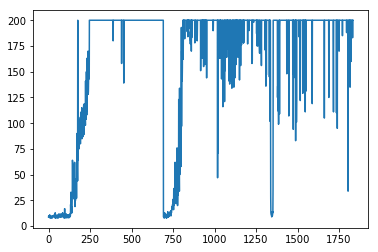

In [81]:
plt.plot(rewards)

In [47]:
env.render(close=True)

In [46]:
dqn.test(env, nb_episodes=5)

Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 89.000, steps: 89
Episode 3: reward: 119.000, steps: 119
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
